In [106]:
import pandas as pd
import gmaps as gp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.patches as mpatches
from shapely.wkt import loads
from shapely.geometry import shape, MultiPolygon, Point, LineString
import geojson
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

rc={'axes.labelsize': 20, 'legend.fontsize': 15, 'xtick.labelsize': 'medium','ytick.labelsize': 'medium', 'savefig.bbox' : 'tight', 'savefig.pad_inches' : 0.2 }
plt.rcParams.update(**rc)

sns.set_style("white")
TAM_IMG=(12,8) #Tamaño de las imagenes
dest_img = "./imagenes/"

In [107]:
def guardar_imagen(nombre):
    plt.savefig(dest_img + nombre.strip().replace(' ','-') + '.png')

In [108]:
def plotear_distancias(df,x,y,titulo,label_x=None,label_y=None,color_reg='red',color_scatter='blue'):
    fig, ax = plt.subplots(figsize=TAM_IMG)
    fit = np.polyfit(df[x],df[y], deg=1)
    regresion, = ax.plot(df[x], fit[0] * df[x] + fit[1], color=color_reg)
    scatter = ax.scatter(df[x], df[y],color=color_scatter)
    plt.legend([scatter, regresion], ['Propiedades', 'Tendencia'])
    if(label_x and label_y):
        plt.xlabel(label_x)
        plt.ylabel(label_y)
    guardar_imagen(titulo)
    plt.show()

In [109]:
#Distancia minima entre un punto y una lista de puntos
from haversine import haversine
def distancia_minima(partida, points):
    dist_min = 9999999
    distancias=[]
    for destino in points:
        dist= round(haversine(partida,destino),1)
        if (dist<dist_min):
            dist_min = dist
    return dist

In [110]:
properati = pd.read_csv('datos/properati_2.csv')

In [111]:
properati.dtypes

created_on                     object
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [112]:
properati.loc[:,('created_on')] = pd.to_datetime(properati['created_on'])

In [113]:
#Saco algunas columnas que no parecen servir
properati_filtrado = properati.drop( ['country_name','geonames_id','place_with_parent_names','operation','image_thumbnail'], 1)
# los geonames hacen referencia a place_name y no a la propiedad
properati_filtrado.dropna(how='all',inplace=True)
properati_filtrado = properati_filtrado.loc[properati_filtrado.price_per_m2 < 100000]
properati_filtrado['lat-lon'] = zip(properati_filtrado['lat-lon'])

## Cantidad de propiedades segun zona

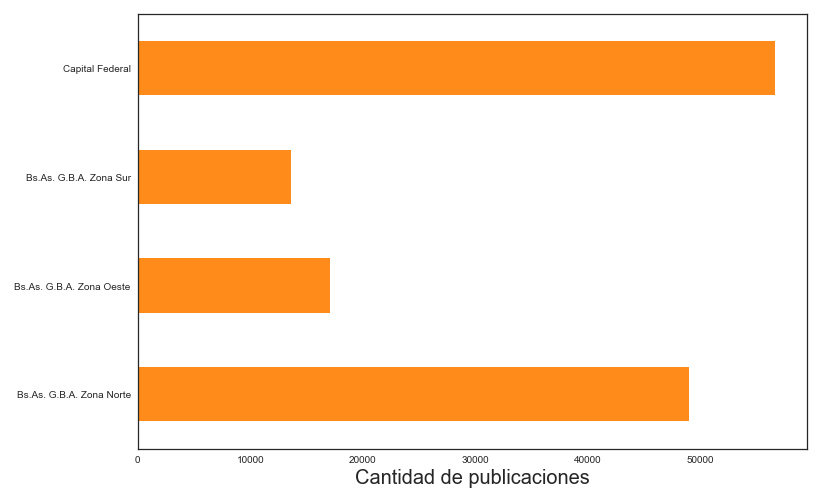

In [114]:
properati_filtrado.groupby('state_name').count()['created_on'].plot(kind='barh',figsize=TAM_IMG,color='#ff8c1a')
titulo = 'Cantidad de propiedades segun zona'
plt.xlabel('Cantidad de publicaciones')
plt.ylabel('')
guardar_imagen(titulo)
plt.show()

## Precio por m2 promedio por zona

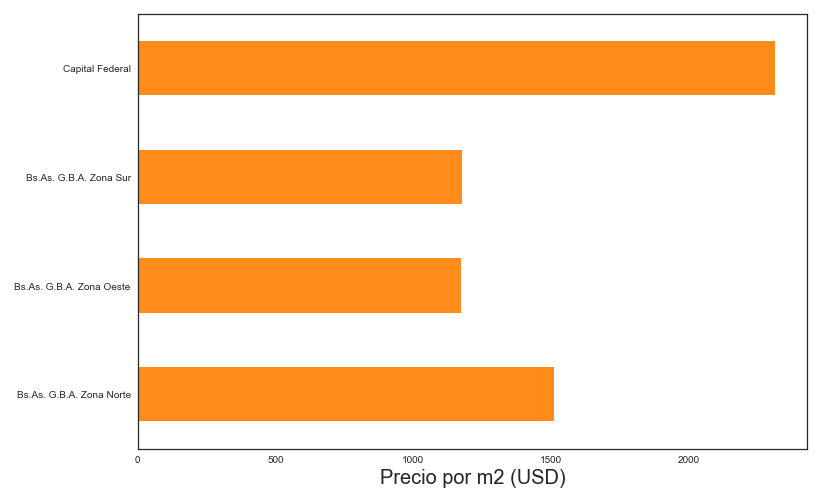

In [115]:
properati_filtrado.groupby('state_name').mean()['price_usd_per_m2'].plot(kind='barh',figsize=TAM_IMG,color='#ff8c1a')
titulo = 'Precio por m2 promedio por zona'
plt.xlabel('Precio por m2 (USD)')
plt.ylabel('')
guardar_imagen(titulo)
plt.show()

## Promedio de superficie de propiedades por zona

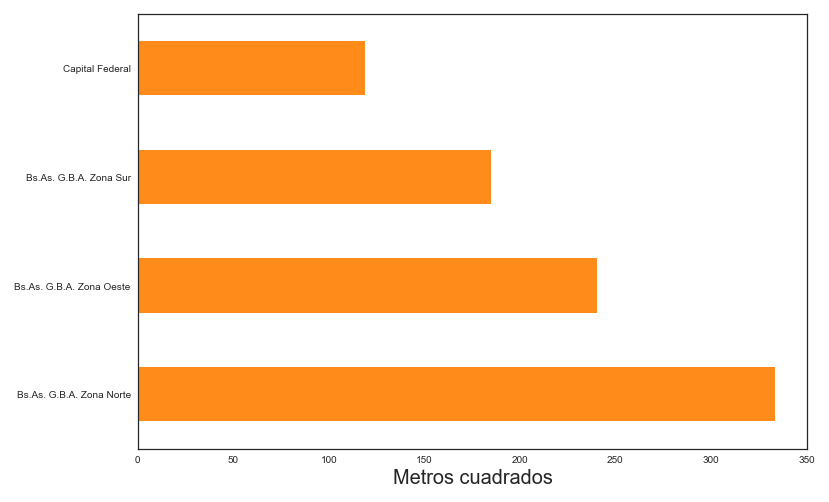

In [116]:
properati_filtrado.groupby('state_name').mean()['surface_total_in_m2'].plot(kind='barh',figsize=TAM_IMG,color='#ff8c1a')
titulo = ' Promedio de superficie de propiedades por zona'
plt.xlabel('Metros cuadrados')
plt.ylabel('')
guardar_imagen(titulo)
plt.show()

## Pisos por zona

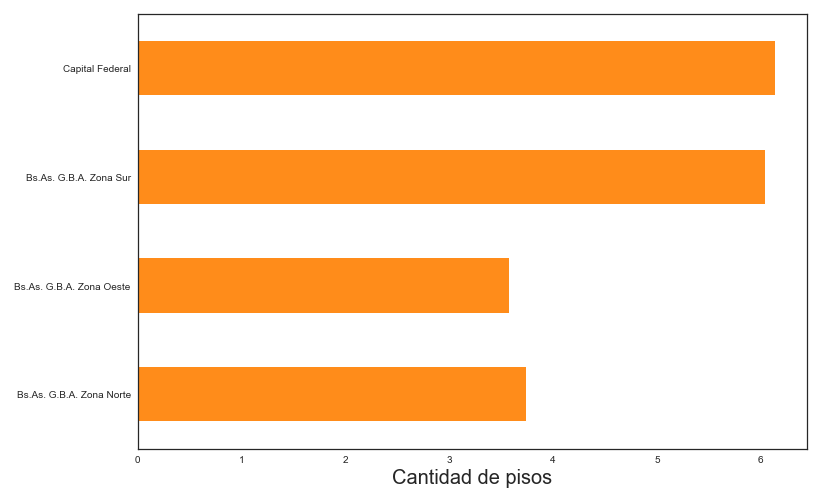

In [117]:
properati_filtrado.groupby('state_name').mean()['floor'].plot(kind='barh',figsize=TAM_IMG,color='#ff8c1a')
titulo = 'Pisos por zona'
plt.ylabel('')
plt.xlabel('Cantidad de pisos')
guardar_imagen(titulo)
plt.show()

## Cantidad de tipos de propiedades por zona

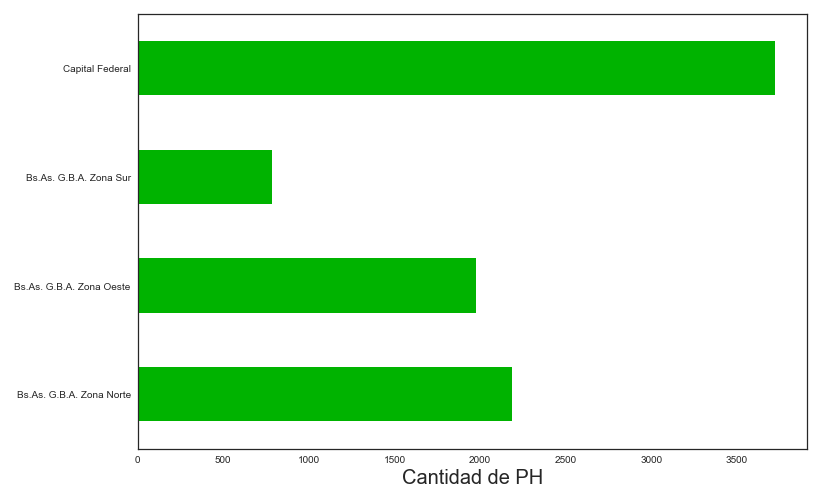

In [118]:
ranking_tipos = properati_filtrado.loc[properati_filtrado['property_type']=='PH'].groupby('state_name').count()['created_on']
ranking_tipos.plot(kind='barh',figsize=TAM_IMG,color='#00b300')
titulo = 'Top PH por zonas'
plt.ylabel('')
plt.xlabel('Cantidad de PH')
guardar_imagen(titulo)
plt.show()

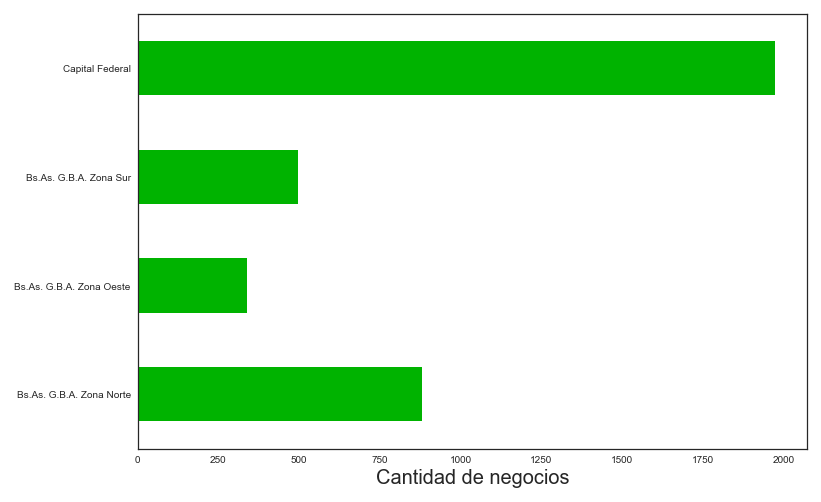

In [119]:
ranking_tipos = properati_filtrado.loc[properati_filtrado['property_type']=='store'].groupby('state_name').count()['created_on']
ranking_tipos.plot(kind='barh',figsize=TAM_IMG,color='#00b300')
titulo = 'Top negocios por zonas'
plt.ylabel('')
plt.xlabel('Cantidad de negocios')
guardar_imagen(titulo)
plt.show()

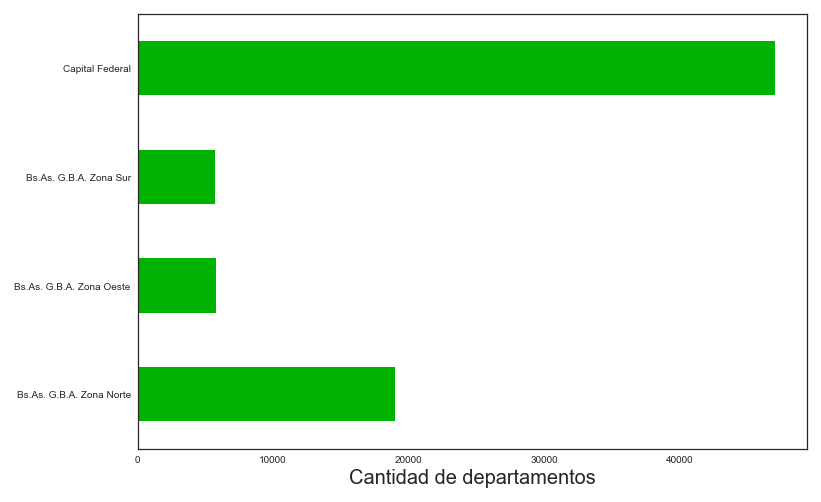

In [120]:
ranking_tipos = properati_filtrado.loc[properati_filtrado['property_type']=='apartment'].groupby('state_name').count()['created_on']
ranking_tipos.plot(kind='barh',figsize=TAM_IMG,color='#00b300')
titulo = 'Top departamento por zonas'
plt.ylabel('')
plt.xlabel('Cantidad de departamentos')
guardar_imagen(titulo)
plt.show()

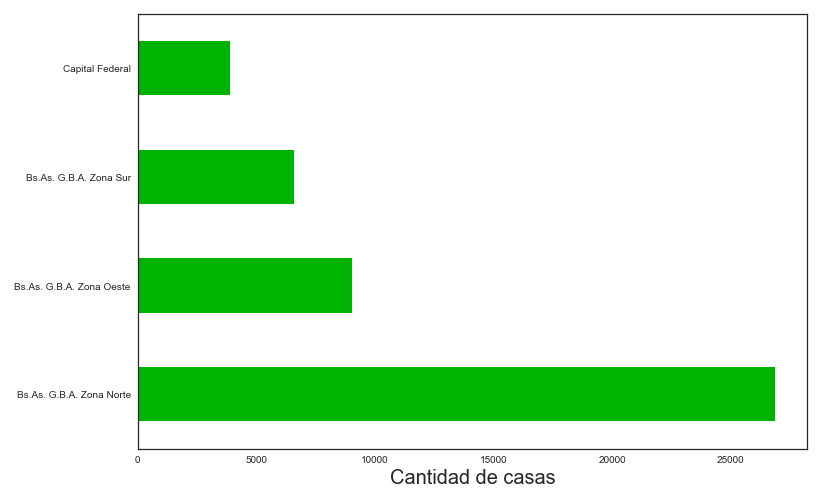

In [121]:
ranking_tipos = properati_filtrado.loc[properati_filtrado['property_type']=='house'].groupby('state_name').count()['created_on']
ranking_tipos.plot(kind='barh',figsize=TAM_IMG,color='#00b300')
titulo='Top casas por zonas'
plt.ylabel('')
plt.xlabel('Cantidad de casas')
guardar_imagen(titulo)
plt.show()

In [122]:
zona_norte = properati_filtrado.loc[properati_filtrado.state_name.str.contains('Norte')]
zona_sur = properati_filtrado.loc[properati_filtrado.state_name.str.contains('Sur')]
zona_oeste = properati_filtrado.loc[properati_filtrado.state_name.str.contains('Oeste')]
caba = properati_filtrado.loc[properati_filtrado.state_name == 'Capital Federal']

## Ranking precio por m2 por barrios

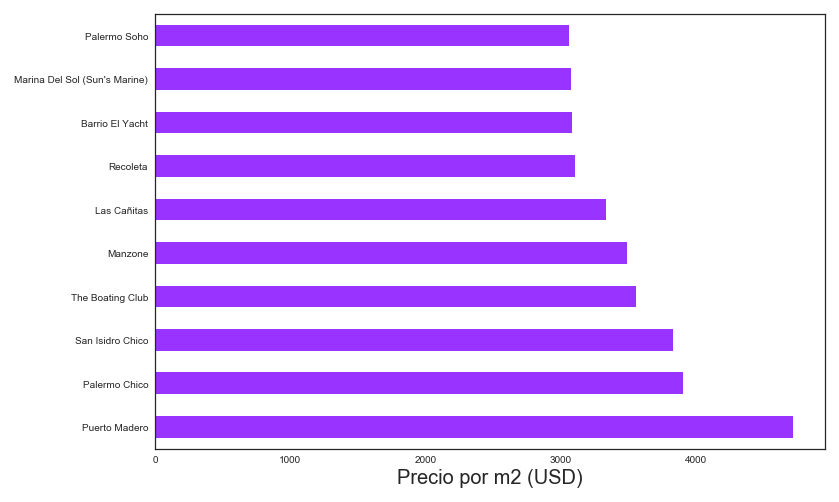

In [123]:
titulo = 'Ranking precio por m2 por barrios'
properati_filtrado.groupby('place_name').mean()['price_usd_per_m2'].sort_values(ascending=False).head(10).plot(kind='barh',figsize=TAM_IMG,color='#9933ff')
plt.ylabel(' ')
plt.xlabel('Precio por m2 (USD)')
guardar_imagen(titulo)
plt.show()

## Ranking precio por m2 de tipo de propiedades por barrios

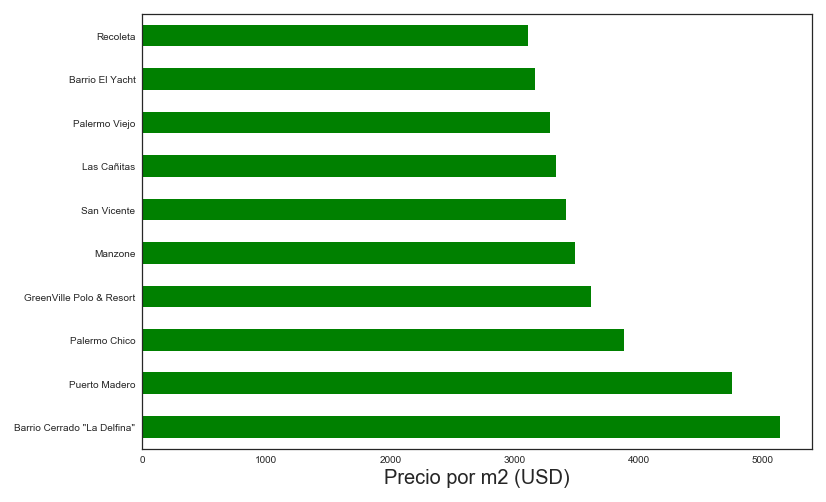

In [124]:
ranking_precios_usd = properati_filtrado.loc[properati_filtrado['property_type']=='apartment'].groupby('place_name').mean()['price_usd_per_m2'].sort_values(ascending=False).head(10)
ranking_precios_usd.plot(kind='barh',figsize=TAM_IMG,color='g')
titulo = 'Top departamentos por barrios'
plt.ylabel('')
plt.xlabel('Precio por m2 (USD)')
guardar_imagen(titulo)
plt.show()

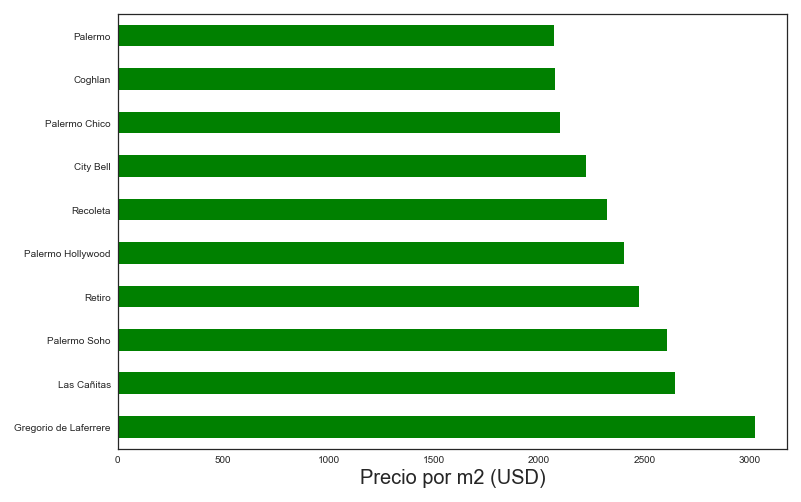

In [125]:
ranking_precios_usd = properati_filtrado.loc[properati_filtrado['property_type']=='PH'].groupby('place_name').mean()['price_usd_per_m2'].sort_values(ascending=False).head(10)
ranking_precios_usd.plot(kind='barh',figsize=TAM_IMG,color='g')
titulo = 'Top PH por barrios'
plt.ylabel('')
plt.xlabel('Precio por m2 (USD)')
guardar_imagen(titulo)
plt.show()

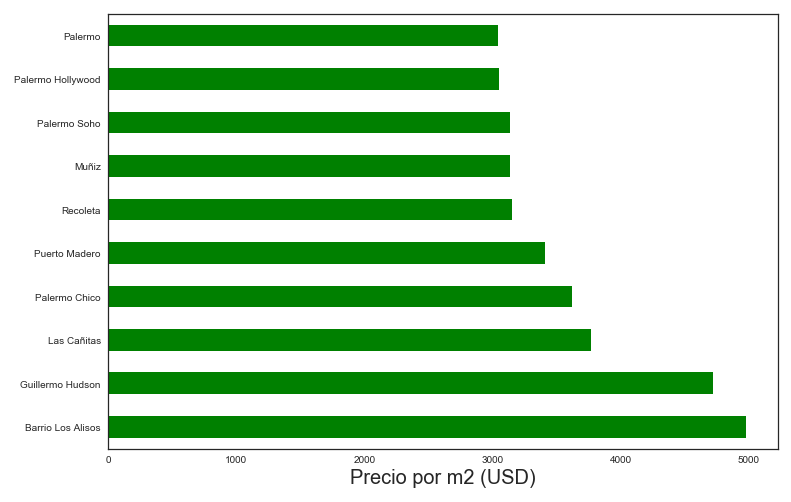

In [126]:
ranking_precios_usd = properati_filtrado.loc[properati_filtrado['property_type']=='store'].groupby('place_name').mean()['price_usd_per_m2'].sort_values(ascending=False).head(10)
# hudson tiene una sola publicacion
ranking_precios_usd.plot(kind='barh',figsize=TAM_IMG,color='g')
titulo = 'Top negocios por barrios'
plt.ylabel('')
plt.xlabel('Precio por m2 (USD)')
plt.show()

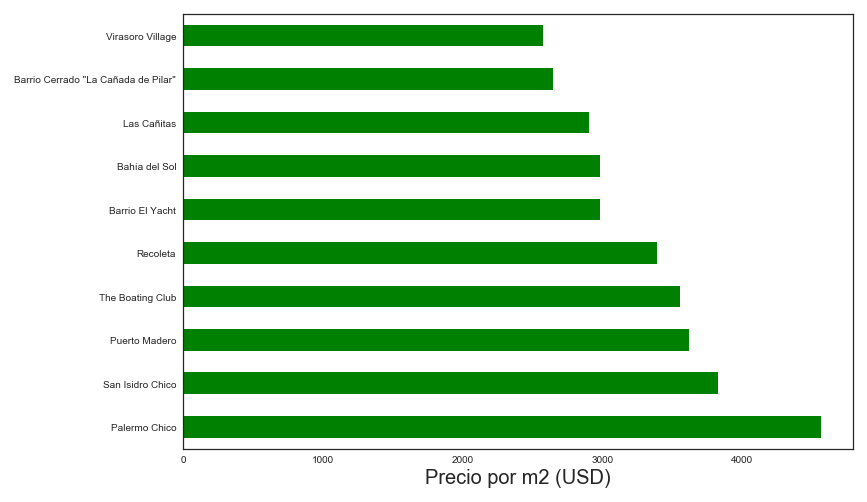

In [127]:
ranking_precios_usd = properati_filtrado.loc[properati_filtrado['property_type']=='house'].groupby('place_name').mean()['price_usd_per_m2'].sort_values(ascending=False).head(10)
ranking_precios_usd.plot(kind='barh',figsize=TAM_IMG,color='g')
titulo = 'Top casas por barrios'
plt.ylabel('')
plt.xlabel('Precio por m2 (USD)')
guardar_imagen(titulo)
plt.show()

## Ranking cantidad de propiedades por barrios


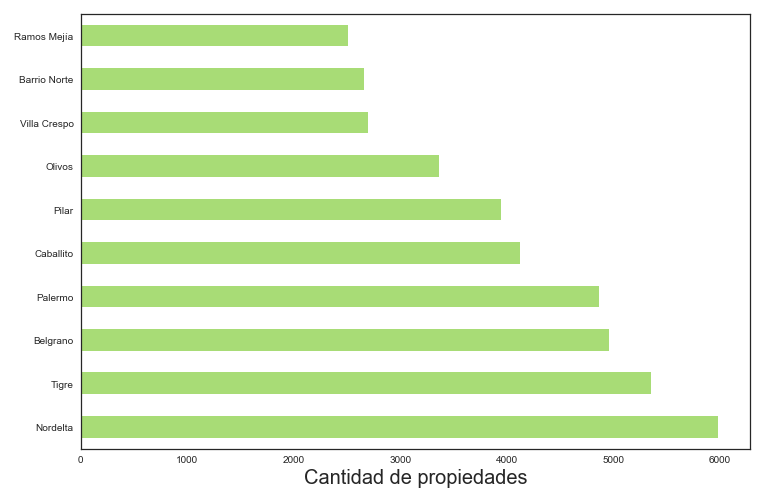

In [128]:
ranking_tipos = properati_filtrado.groupby('place_name').count()['created_on'].sort_values(ascending=False).head(10)
ranking_tipos.plot(kind='barh',figsize=TAM_IMG,color='#a8dc76')
titulo = 'Cantidad de propiedades por barrio'
plt.ylabel('')
plt.xlabel('Cantidad de propiedades')
guardar_imagen(titulo)
plt.show()

## Ranking cantidad de tipos de propiedades por barrios

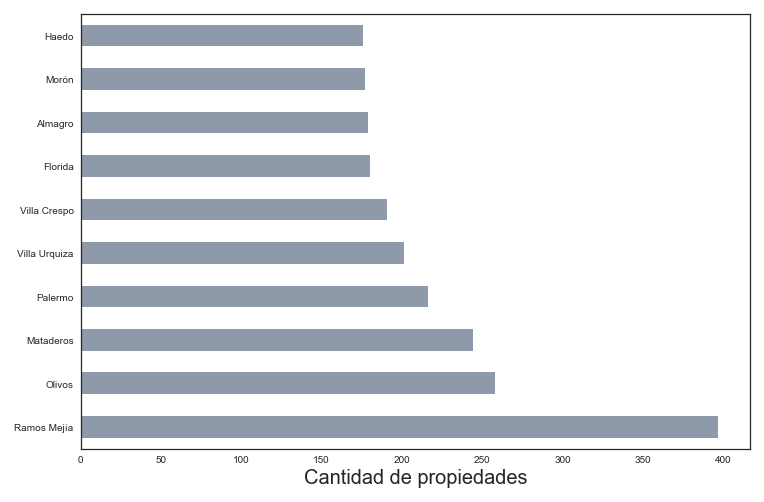

In [129]:
ranking_tipos = properati_filtrado.loc[properati_filtrado['property_type']=='PH'].groupby('place_name').count()['created_on'].sort_values(ascending=False).head(10)
ranking_tipos.plot(kind='barh',figsize=TAM_IMG,color='#8e99aa')
titulo = 'Cantidad PH por barrio'
plt.ylabel('')
plt.xlabel('Cantidad de propiedades')
guardar_imagen(titulo)
plt.show()

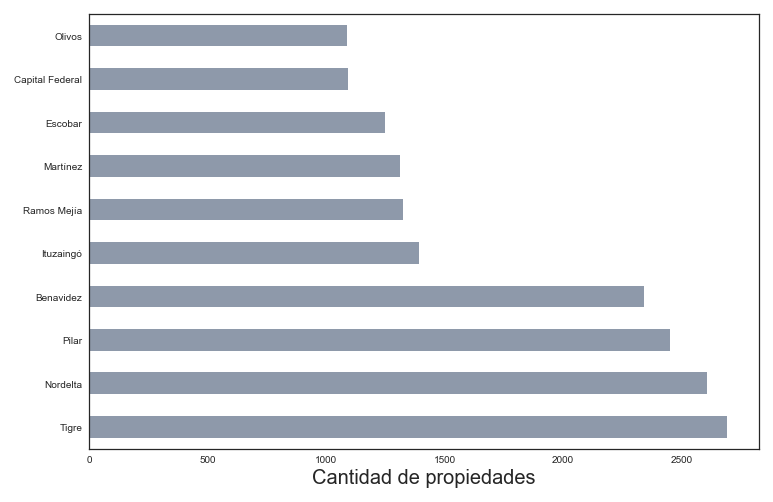

In [130]:
ranking_tipos = properati_filtrado.loc[properati_filtrado['property_type']=='house'].groupby('place_name').count()['created_on'].sort_values(ascending=False).head(10)
ranking_tipos.plot(kind='barh',figsize=TAM_IMG,color='#8e99aa')
titulo = 'Cantidad de casas por barrio'
plt.ylabel('')
plt.xlabel('Cantidad de propiedades')
guardar_imagen(titulo)
plt.show()

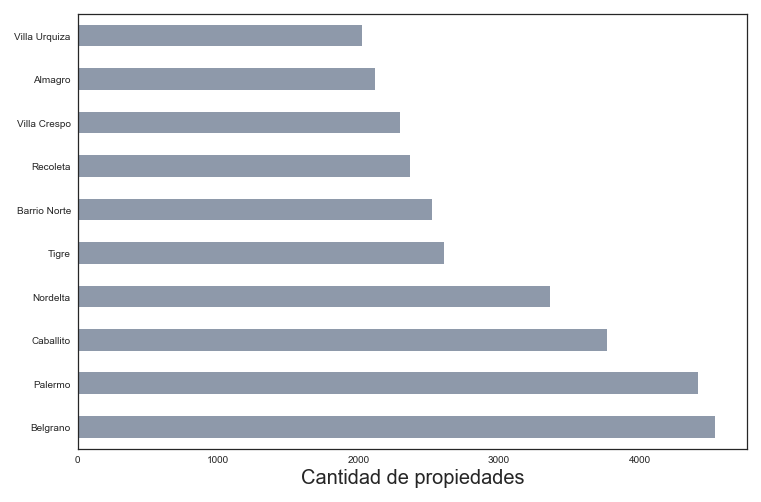

In [131]:
ranking_tipos = properati_filtrado.loc[properati_filtrado['property_type']=='apartment'].groupby('place_name').count()['created_on'].sort_values(ascending=False).head(10)
ranking_tipos.plot(kind='barh',figsize=TAM_IMG,color='#8e99aa')
titulo = 'Cantidad de departamentos por barrios'
plt.ylabel('')
plt.xlabel('Cantidad de propiedades')
guardar_imagen(titulo)
plt.show()

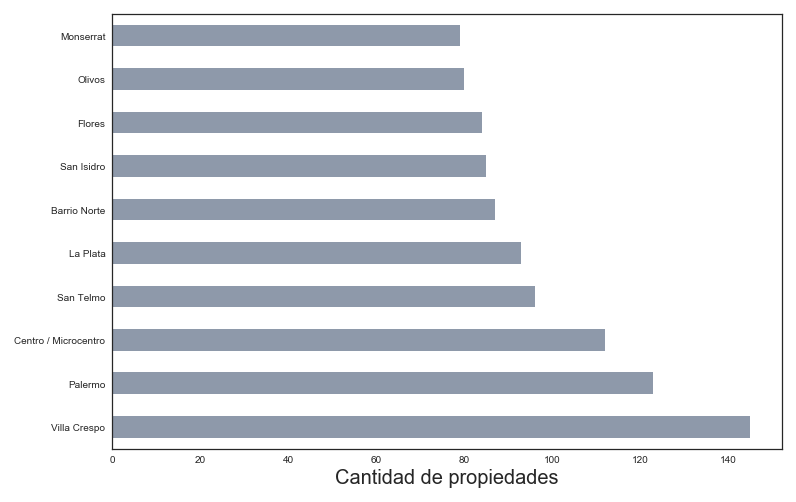

In [132]:
ranking_tipos = properati_filtrado.loc[properati_filtrado['property_type']=='store'].groupby('place_name').count()['created_on'].sort_values(ascending=False).head(10)
ranking_tipos.plot(kind='barh',figsize=TAM_IMG,color='#8e99aa')
titulo='Cantidad de negocios por barrio'
plt.ylabel('')
plt.xlabel('Cantidad de propiedades')
guardar_imagen(titulo)
plt.show()

In [133]:
propiedades_full=properati

In [134]:
properties_by_type=propiedades_full[['place_name','property_type']]


In [135]:
properties_by_type_and_total=properties_by_type.groupby('place_name').count().reset_index()

In [136]:
properties_by_type_and_total.columns=['place_name','total_properties']
properties_by_type_and_total

,place_name,total_properties
0,Country Maschwitz Club,31
1,los alamos,2
2,9 de Abril,3
3,Abasto,277
4,Abril Club de Campo,35
5,Acacias Blancas,92
6,Acassuso,832
7,Adrogué,1135
8,Aeropuerto Internacional Ezeiza,8
9,Agronomía,175


In [137]:
properties_by_type=properties_by_type.groupby('place_name').apply(lambda x: x['property_type'].value_counts()).reset_index()
properties_by_type=pd.pivot_table(properties_by_type,index=['place_name'],columns=['level_1']).reset_index()
properties_by_type

place_name property_type                   \
level_1                                                PH apartment  house   
0                    Country Maschwitz Club           NaN       NaN   31.0   
1                                los alamos           NaN       1.0    1.0   
2                                9 de Abril           NaN       NaN    1.0   
3                                    Abasto          27.0     214.0   15.0   
4                       Abril Club de Campo           NaN       NaN   35.0   
5                           Acacias Blancas           NaN       NaN   92.0   
6                                  Acassuso          24.0     291.0  472.0   
7                                   Adrogué          37.0     320.0  742.0   
8           Aeropuerto Internacional Ezeiza           NaN       NaN    8.0   
9                                 Agronomía          22.0     135.0   12.0   
10                 Albanueva Barrio Cerrado           NaN      16.0   17.0   
11                               Aldo Bonzi           2.0       1.0    4.0   
12                           Alejandro Korn           NaN       1.0   18.0   
13                         Alejandro Petión           NaN       NaN    4.0   
14                                  Almagro         208.0    2528.0   76.0   
15                          Almirante Brown           1.0      21.0   59.0   
16                                 Altamira           NaN       NaN   23.0   
17                        Altos de Hudson I           NaN       1.0    2.0   
18                       Altos de Hudson II           NaN      10.0   10.0   
19                Altos de Manzanares 1 y 2           NaN       NaN    7.0   
20                          Altos de Matheu           NaN       NaN    6.0   
21                           Altos del Golf           NaN       NaN   16.0   
22                          Altos del Pilar           NaN       NaN   20.0   
23                     Armenia Country Club           NaN       NaN    6.0   
24                             Arturo Seguí           NaN       NaN   14.0   
25                               Avellaneda          48.0     437.0   85.0   
26                            Bahía del Sol           NaN       1.0    3.0   
27                                Balvanera         134.0    1697.0   22.0   
28                                 Banfield          70.0     628.0  635.0   
29                Barbarita, Barrio Cerrado           NaN       NaN   39.0   
..                                      ...           ...       ...    ...   
569                          Villa Martelli          58.0      39.0   65.0   
570                        Villa Monteagudo           2.0       NaN    2.0   
571                           Villa Ortuzar          30.0     171.0   18.0   
572                           Villa Pacheco           NaN       NaN    8.0   
573                        Villa Pueyrredón         127.0     312.0   99.0   
574                             Villa Raffo          11.0      36.0   14.0   
575                              Villa Real          50.0      50.0   35.0   
576                         Villa Riachuelo           2.0       1.0    4.0   
577                              Villa Rosa           3.0     105.0   84.0   
578                        Villa Santa Rita          39.0     140.0   38.0   
579                         Villa Sarmiento          61.0     260.0  196.0   
580                           Villa Soldati           8.0      25.0    5.0   
581                             Villa Tesei           2.0      13.0   33.0   
582                           Villa Udaondo           3.0       1.0   97.0   
583                           Villa Urquiza         283.0    2780.0  187.0   
584                          Villa Vatteone           NaN       NaN    2.0   
585                           Villa de Mayo           1.0      23.0   56.0   
586                        Villa del Parque         106.0     806.0  127.0   
587      Village Golf & Tennis Country Club           N

In [138]:
 properties_by_type.columns=['place_name','PH','apartment','house','store']

In [139]:
properties_by_type_and_total=pd.merge(properties_by_type,properties_by_type_and_total,on = 'place_name', how='left')

In [140]:
properties_by_type_and_total_mean=properties_by_type_and_total

In [141]:
properties_by_type_and_total_mean=properties_by_type_and_total_mean.fillna(value=0)

In [142]:
properties_by_type_and_total_mean.loc[:,('apartment_percent')]=properties_by_type_and_total_mean['apartment']/properties_by_type_and_total_mean['total_properties']
properties_by_type_and_total_mean.loc[:,('PH_percent')]=properties_by_type_and_total_mean['PH']/properties_by_type_and_total_mean['total_properties']
properties_by_type_and_total_mean.loc[:,('house_percent')]=properties_by_type_and_total_mean['house']/properties_by_type_and_total_mean['total_properties']
properties_by_type_and_total_mean.loc[:,('store_percent')]=properties_by_type_and_total_mean['store']/properties_by_type_and_total_mean['total_properties']

In [143]:
properties_by_type_and_total_mean

,place_name,PH,apartment,house,store,total_properties,apartment_percent,PH_percent,house_percent,store_percent
0,Country Maschwitz Club,0.0,0.0,31.0,0.0,31,0.000000,0.000000,1.000000,0.000000
1,los alamos,0.0,1.0,1.0,0.0,2,0.500000,0.000000,0.500000,0.000000
2,9 de Abril,0.0,0.0,1.0,2.0,3,0.000000,0.000000,0.333333,0.666667
3,Abasto,27.0,214.0,15.0,21.0,277,0.772563,0.097473,0.054152,0.075812
4,Abril Club de Campo,0.0,0.0,35.0,0.0,35,0.000000,0.000000,1.000000,0.000000
5,Acacias Blancas,0.0,0.0,92.0,0.0,92,0.000000,0.000000,1.000000,0.000000
6,Acassuso,24.0,291.0,472.0,45.0,832,0.349760,0.028846,0.567308,0.054087
7,Adrogué,37.0,320.0,742.0,36.0,1135,0.281938,0.032599,0.653744,0.031718
8,Aeropuerto Internacional Ezeiza,0.0,0.0,8.0,0.0,8,0.000000,0.000000,1.000000,0.000000
9,Agronomía,22.0,135.0,12.0,6.0,175,0.771429,0.125714,0.068571,0.034286


In [144]:
properties_by_usd_m2=propiedades_full[['place_name','price_usd_per_m2']].dropna().groupby('place_name').mean().reset_index()

In [145]:
properties_by_m2_and_type_mean=pd.merge(properties_by_usd_m2,properties_by_type_and_total_mean,on='place_name',how='left')

In [146]:
properties_by_m2_and_type_mean_greater_than_20 = properties_by_m2_and_type_mean[properties_by_m2_and_type_mean['total_properties']>20]\
[['apartment_percent','PH_percent','store_percent','house_percent','price_usd_per_m2']].groupby('price_usd_per_m2').mean().reset_index()

In [147]:
def agrupar_scatter(df,x,y,color,label):
    plot=ax.scatter(df[x], df[y],color=color,label=label)

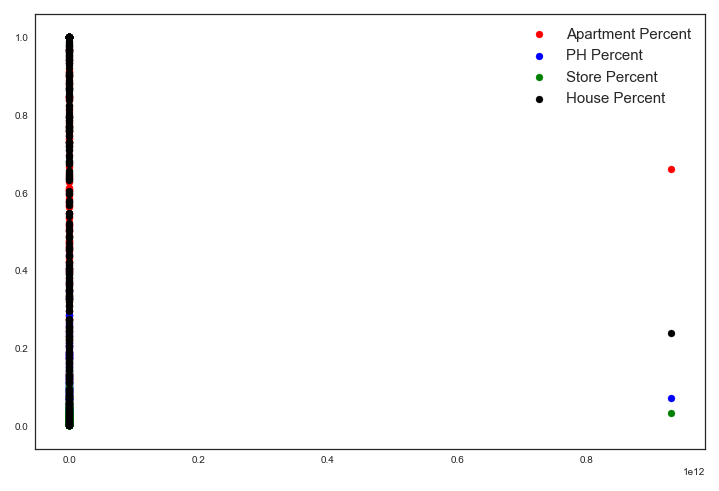

In [148]:
fig, ax = plt.subplots(figsize=TAM_IMG)
agrupar_scatter(properties_by_m2_and_type_mean_greater_than_20,'price_usd_per_m2','apartment_percent','red','Apartment Percent')
agrupar_scatter(properties_by_m2_and_type_mean_greater_than_20,'price_usd_per_m2','PH_percent','blue','PH Percent')
agrupar_scatter(properties_by_m2_and_type_mean_greater_than_20,'price_usd_per_m2','store_percent','green','Store Percent')
agrupar_scatter(properties_by_m2_and_type_mean_greater_than_20,'price_usd_per_m2','house_percent','black','House Percent')
plt.legend(loc='upper right')
plt.show()

In [149]:
def aproximaciones_lineales_agrupadas(df,x,y,color,ax,label):
    fit = np.polyfit(df[x],df[y], deg=1)
    ax.plot(df[x], fit[0] * df[x] + fit[1], color=color,label=label)


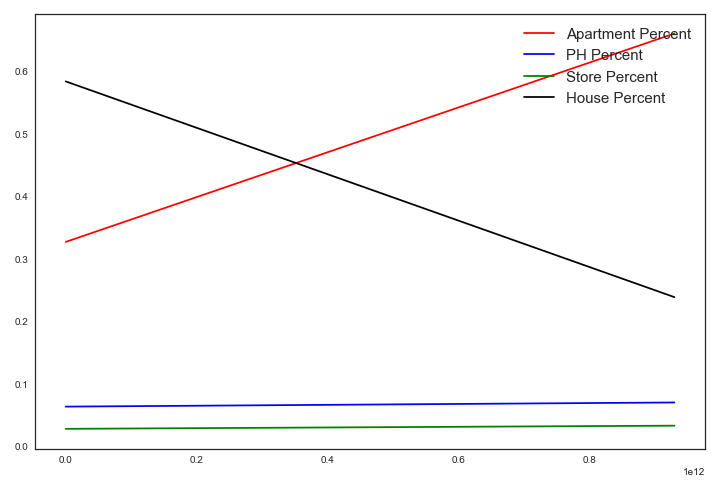

In [150]:
fig, ax = plt.subplots(figsize=TAM_IMG)
aproximaciones_lineales_agrupadas(properties_by_m2_and_type_mean_greater_than_20,'price_usd_per_m2','apartment_percent','red',ax,'Apartment Percent')
aproximaciones_lineales_agrupadas(properties_by_m2_and_type_mean_greater_than_20,'price_usd_per_m2','PH_percent','blue',ax,'PH Percent')
aproximaciones_lineales_agrupadas(properties_by_m2_and_type_mean_greater_than_20,'price_usd_per_m2','store_percent','green',ax,'Store Percent')
aproximaciones_lineales_agrupadas(properties_by_m2_and_type_mean_greater_than_20,'price_usd_per_m2','house_percent','black',ax,'House Percent')
plt.legend(loc='upper right')
plt.show()


## propiedades con patio y a estrenar

In [151]:
news_properties_with_garden=pd.DataFrame({'place_name':propiedades_full['place_name']\
                                          ,'description':propiedades_full['description'],'price_usd_per_m2':propiedades_full['price_usd_per_m2']})


In [152]:
news_properties_with_garden=news_properties_with_garden.dropna(how='any')

In [153]:
news_properties_with_garden.loc[:,'has_garden']=news_properties_with_garden.loc[:,'description'].str.lower().str.contains('patio')
news_properties_with_garden.loc[:,'is_new']=news_properties_with_garden.loc[:,'description'].str.lower().str.contains('estrenar')

In [154]:
#news_properties_with_garden.plot.bar()

## Veamos cuales son las ciudades que vendieron más casas con patio

In [155]:
properties_total=propiedades_full[['place_name','property_type']]
#Calculo el total de las ventas por ciudad
properties_total=properties_total.groupby('place_name').count().reset_index()

In [156]:
properties_total.columns=['place_name','total']

In [157]:
#Calculo la cantidad de casas con jardines vendidas por ciudad
properties_garden_count=news_properties_with_garden[['place_name','has_garden']][news_properties_with_garden['has_garden']]\
.groupby('place_name').count().reset_index()

In [158]:
#Merge entre cantidad de casas con jardines con cantidad total de casas
properties_garden_count=pd.merge(properties_garden_count,properties_total,on='place_name',how='left')

In [159]:
properties_garden_count.loc[:,('has_garden_percent')]=properties_garden_count['has_garden']/properties_garden_count['total']

In [160]:
#Elimino los datos con menores a 50 ventas.
properties_garden_count=properties_garden_count[properties_garden_count['total']>50]

In [161]:
property_by_price_m2_and_place=properati_filtrado.groupby('place_name').mean()['price_usd_per_m2'].reset_index()
properties_garden_count=pd.merge(properties_garden_count,property_by_price_m2_and_place,on='place_name',how='left')
properties_garden_count=properties_garden_count[properties_garden_count['price_usd_per_m2']<4000]

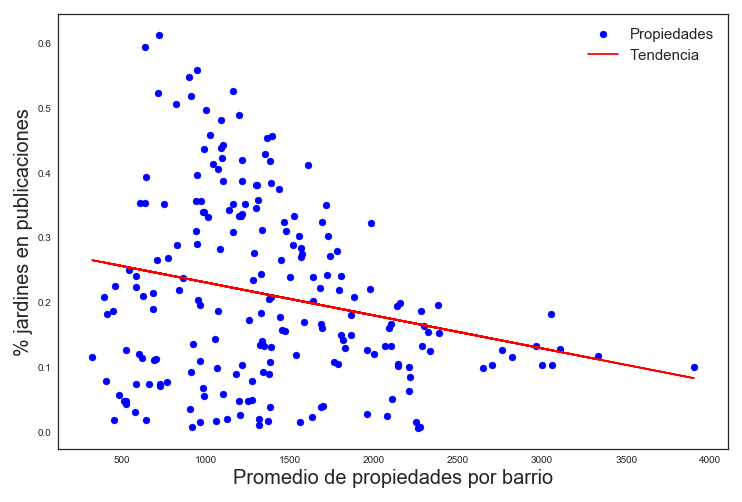

In [162]:
plotear_distancias(properties_garden_count,'price_usd_per_m2','has_garden_percent','precio promedio vs porcentaje jardin','Promedio de propiedades por barrio','% jardines en publicaciones')

## Mismo análisis con propiedades a estrenar

In [163]:
#Calculo la cantidad de casas con jardines vendidas por ciudad
news_properties_count=news_properties_with_garden[['place_name','is_new']][news_properties_with_garden['is_new']]\
.groupby('place_name').count().reset_index()
#Merge entre cantidad de casas a estrenar con cantidad total de casas
news_properties_count=pd.merge(news_properties_count,properties_total,on='place_name',how='left')


In [164]:
news_properties_count.loc[:,('is_new_percent')]=news_properties_count['is_new']/news_properties_count['total']

In [165]:
#Elimino los datos con menores a 50 ventas.
news_properties_count=news_properties_count[news_properties_count['total']>50]

In [166]:
property_by_price_m2_and_place=properati_filtrado.groupby('place_name').mean()['price_usd_per_m2'].reset_index()
news_properties_count=pd.merge(news_properties_count,property_by_price_m2_and_place,on='place_name',how='left')
news_properties_count=news_properties_count[news_properties_count['price_usd_per_m2']<4000]

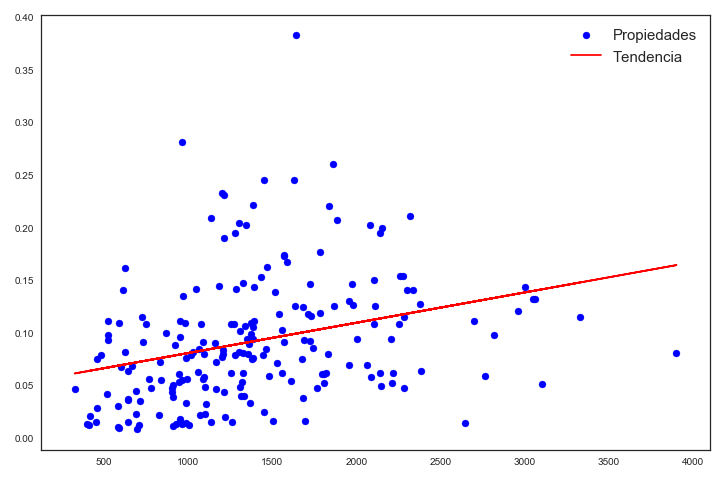

In [167]:
plotear_distancias(news_properties_count,'price_usd_per_m2','is_new_percent','precio promedio vs porcentaje casas nuevas')

## TIpo que se vende mas

In [168]:
top_tipos=properati_filtrado.groupby('property_type')['price'].count().sort_values()
top_tipos

property_type
store         3691
PH            8671
house        46373
apartment    77621
Name: price, dtype: int64

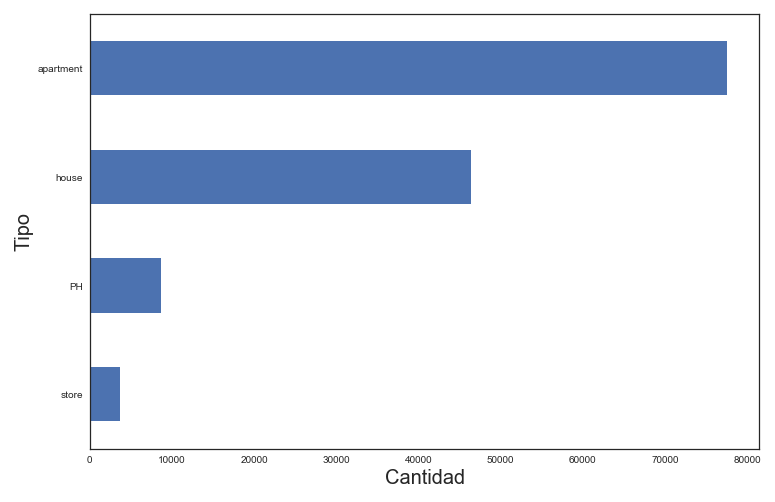

In [169]:
top_tipos.plot(kind='barh',figsize=TAM_IMG)
titulo = 'Tipo mas popular'
plt.ylabel('Tipo')
plt.xlabel('Cantidad')
guardar_imagen(titulo)
plt.show()

## Promedio de precio por tipo

In [170]:
promedio_por_tipo = properati_filtrado.groupby('property_type')['price_usd_per_m2'].mean()

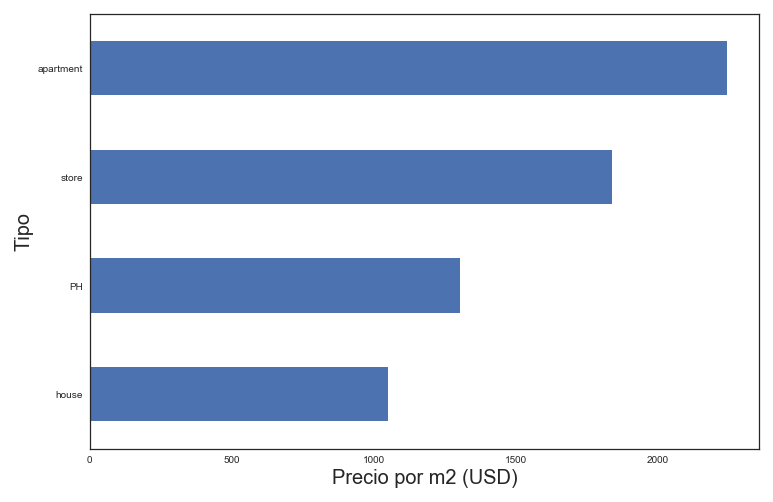

In [171]:
promedio_por_tipo.sort_values().plot(kind='barh',figsize=TAM_IMG)
titulo = 'Promedio de precios por tipo'

plt.ylabel('Tipo')
plt.xlabel('Precio por m2 (USD)')
guardar_imagen(titulo)
plt.show()

## Promedio precio por m2 por mes

In [172]:
properati_filtrado['fecha'] = [(x.year,x.month) for x in properati_filtrado['created_on'] ]
propiedades_por_mes = properati_filtrado.loc[properati_filtrado['fecha']>(2015,1)]
propiedades_por_mes = propiedades_por_mes.groupby(['property_type',properati_filtrado['fecha']])

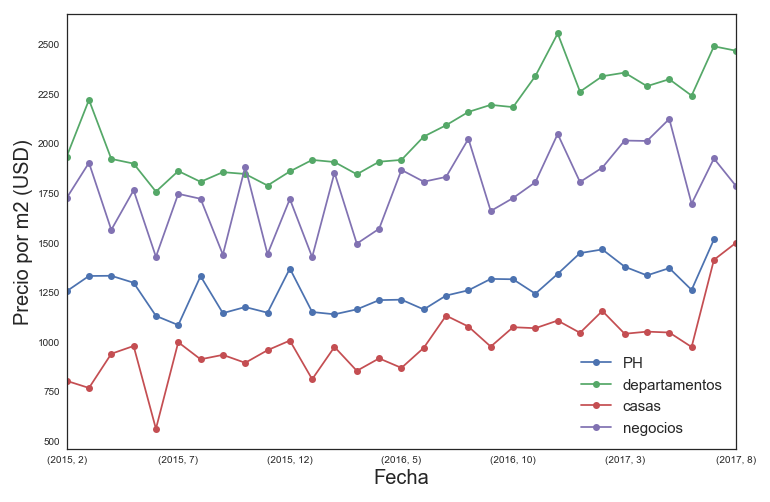

In [173]:
promedio_por_tipo_y_mes= propiedades_por_mes['price_usd_per_m2'].mean().unstack(level=0)
promedio_por_tipo_y_mes.plot(kind='line',marker="o",figsize=TAM_IMG)
titulo = 'Promedio mensual del precio por m2'
plt.ylabel('Precio por m2 (USD)')
plt.xlabel('Fecha')
plt.legend(['PH','departamentos','casas','negocios'])
guardar_imagen(titulo)
plt.show()

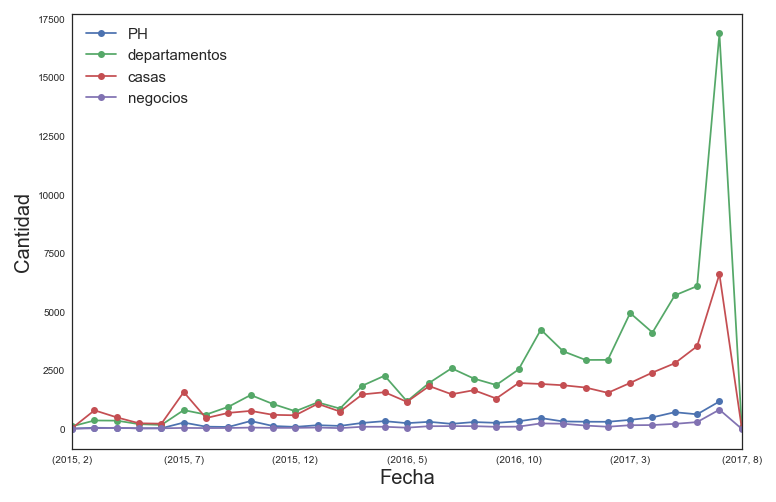

In [174]:
cantidad_por_mes = propiedades_por_mes.count()['created_on'].unstack(level=0)
cantidad_por_mes.plot(kind='line',marker="o",figsize=TAM_IMG)
titulo = 'Cantidad de propiedades al paso del tiempo'
plt.ylabel('Cantidad')
plt.xlabel('Fecha')
plt.legend(['PH','departamentos','casas','negocios'])
guardar_imagen(titulo)
plt.show()

## Cantidad de pisos a traves del tiempo

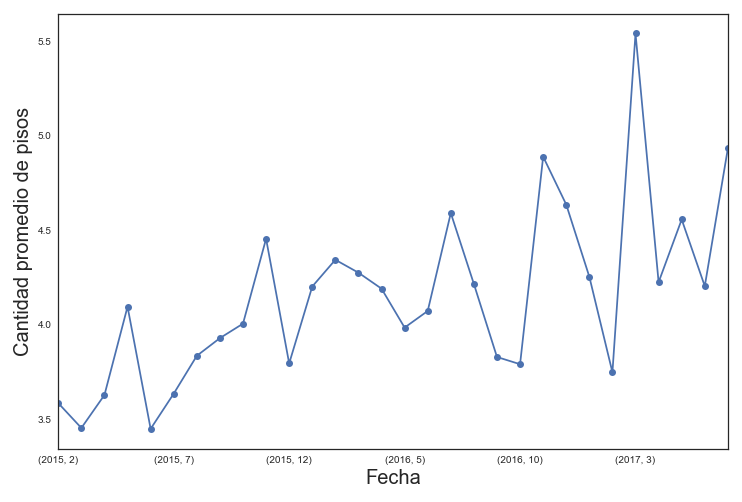

In [175]:
pisos_vs_tiempo = properati_filtrado.loc[properati_filtrado.floor < 55] #https://es.wikipedia.org/wiki/Anexo:Edificios_m%C3%A1s_altos_de_Argentina
pisos_vs_tiempo = pisos_vs_tiempo.loc[pisos_vs_tiempo['fecha']>(2015,1)]
pisos_vs_tiempo.groupby('fecha').mean()['floor'].plot(kind='line',marker="o",figsize=TAM_IMG)
titulo = 'Cantidad de pisos a traves del tiempo'
plt.xlabel('Fecha')
plt.ylabel('Cantidad promedio de pisos')
guardar_imagen(titulo)
plt.show()

##  Mayor cantidad de publicaciones respecto de las expensas y el precio total

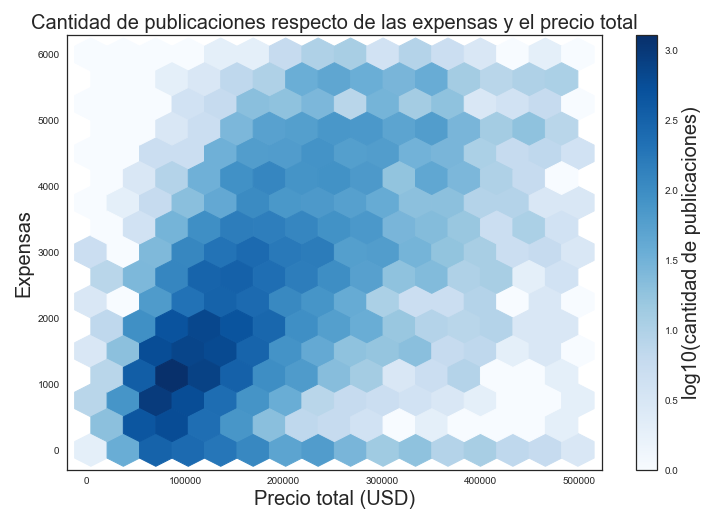

In [176]:
expensas_vs_precio = properati_filtrado.loc[(properati_filtrado['property_type'] == 'apartment') & (properati_filtrado.expenses<6000) & (properati_filtrado.expenses>0) & (properati_filtrado.price_aprox_usd <500000)].loc[:,('price_aprox_usd','expenses')].dropna() #hay unas expensas mal
plt.figure(figsize=TAM_IMG)
plt.hexbin(expensas_vs_precio['price_aprox_usd'],expensas_vs_precio['expenses'], gridsize=15,bins='log',cmap='Blues')
cb = plt.colorbar()
cb.set_label('log10(cantidad de publicaciones)')
titulo = 'Cantidad de publicaciones respecto de las expensas y el precio total'
plt.title(titulo,size=20)
plt.ylabel('Expensas')
plt.xlabel('Precio total (USD)')
guardar_imagen(titulo)
plt.show()

##  Mayor cantidad de publicaciones respecto de las expensas y el precio por m2

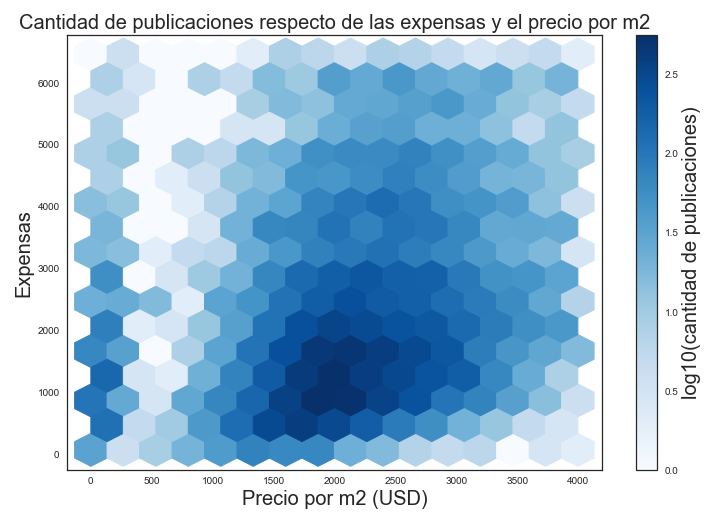

In [177]:
expensas_vs_precio = properati_filtrado.loc[(properati_filtrado['property_type'] == 'apartment') & (properati_filtrado.price_usd_per_m2<4000) & (properati_filtrado.expenses>50) & (properati_filtrado.expenses<6500)].loc[:,('price_usd_per_m2','expenses')].dropna() #hay unas expensas mal
plt.figure(figsize=TAM_IMG)
sns.set_style("white")
plt.hexbin(expensas_vs_precio['price_usd_per_m2'],expensas_vs_precio['expenses'], gridsize=15,bins='log',cmap='Blues')
cb = plt.colorbar()
cb.set_label('log10(cantidad de publicaciones)')
titulo = 'Cantidad de publicaciones respecto de las expensas y el precio por m2'
plt.title(titulo,size=20)
plt.ylabel('Expensas')
plt.xlabel('Precio por m2 (USD)')
guardar_imagen(titulo)
plt.show()

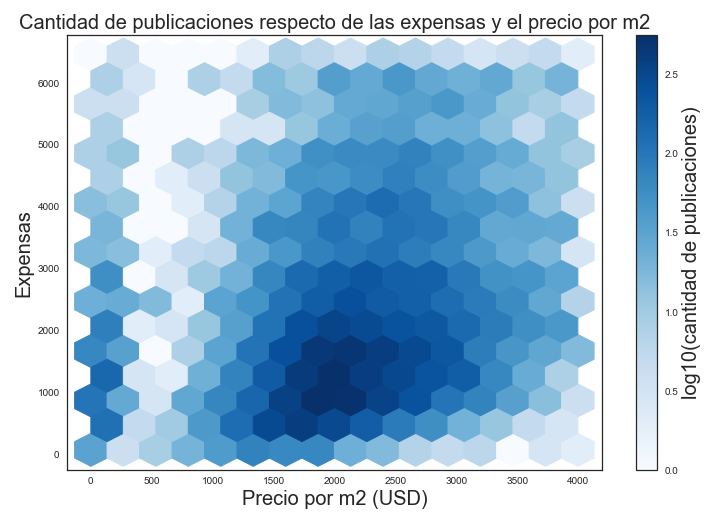

In [178]:
expensas_vs_precio = properati_filtrado.loc[(properati_filtrado['property_type'] == 'apartment') & (properati_filtrado.price_usd_per_m2<4000) & (properati_filtrado.expenses>50) & (properati_filtrado.expenses<6500)].loc[:,('price_usd_per_m2','expenses')].dropna() #hay unas expensas mal
plt.figure(figsize=TAM_IMG)
sns.set_style("white")
plt.hexbin(expensas_vs_precio['price_usd_per_m2'],expensas_vs_precio['expenses'], gridsize=15,bins='log',cmap='Blues')
cb = plt.colorbar()
cb.set_label('log10(cantidad de publicaciones)')
titulo = 'Cantidad de publicaciones respecto de las expensas y el precio por m2'
plt.title(titulo,size=20)
plt.ylabel('Expensas')
plt.xlabel('Precio por m2 (USD)')
guardar_imagen(titulo)
plt.show()

##  Superficie descubierta vs precio 

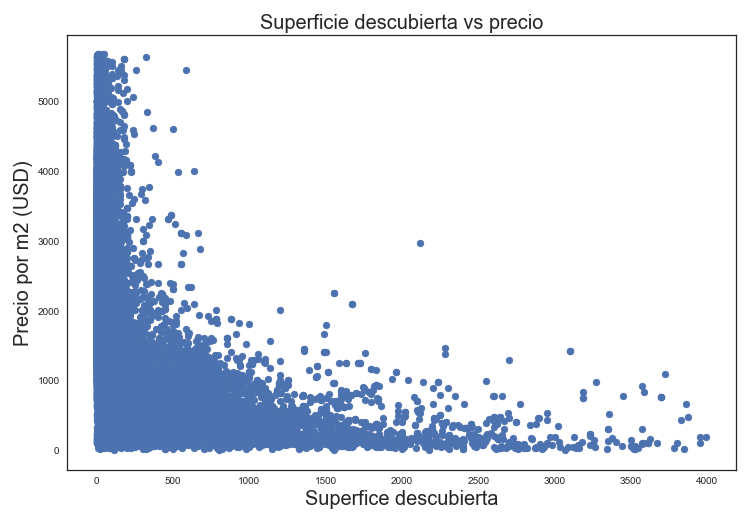

In [179]:
properati_filtrado.loc[:,'superficie_descubierta'] = properati_filtrado['surface_total_in_m2'] - properati_filtrado['surface_covered_in_m2']
properati_filtrado.loc[:,'superficie_descubierta'] = properati_filtrado.loc[properati_filtrado.superficie_descubierta>0 &((properati_filtrado.property_type == "PH")|(properati_filtrado.property_type == "apartment"))]
precio_vs_descubierto= properati_filtrado.loc[:,('price_usd_per_m2','superficie_descubierta')].dropna()
precio_vs_descubierto.groupby('superficie_descubierta').mean()
precio_vs_descubierto = precio_vs_descubierto.loc[precio_vs_descubierto.superficie_descubierta<4000]

plt.figure(figsize=TAM_IMG)
plt.scatter(precio_vs_descubierto['superficie_descubierta'],precio_vs_descubierto['price_usd_per_m2'])
titulo='Superficie descubierta vs precio'
plt.title(titulo,size=20)
plt.ylabel('Precio por m2 (USD)')
plt.xlabel('Superfice descubierta')
guardar_imagen(titulo)
plt.show()

##  Precio por m2 vs habitaciones

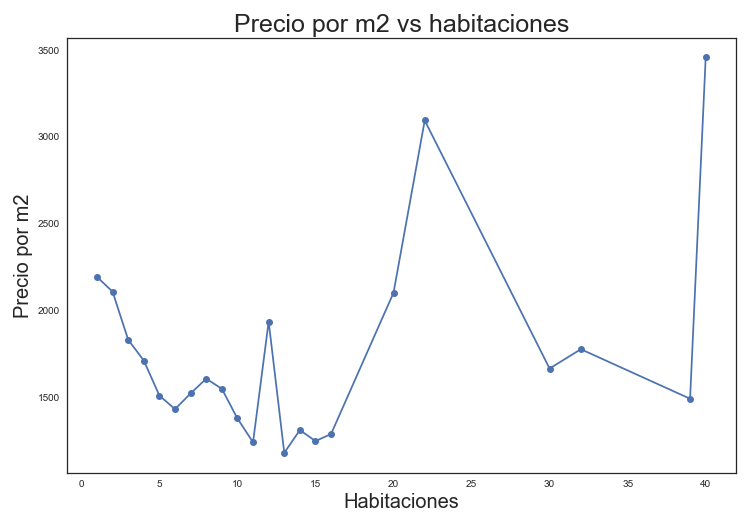

In [180]:
precio_vs_habs= properati_filtrado.loc[:,('price_usd_per_m2','rooms')].dropna()
precio_vs_habs= precio_vs_habs.groupby('rooms').mean()

titulo ='Precio por m2 vs habitaciones'
plt.figure(figsize=TAM_IMG)
plt.xlabel('Habitaciones')
plt.ylabel('Precio por m2')
plt.title(titulo,size= 25)
plt.plot(precio_vs_habs,marker="o")
guardar_imagen(titulo)
plt.show()

##  Piso del departamento vs precio por m2

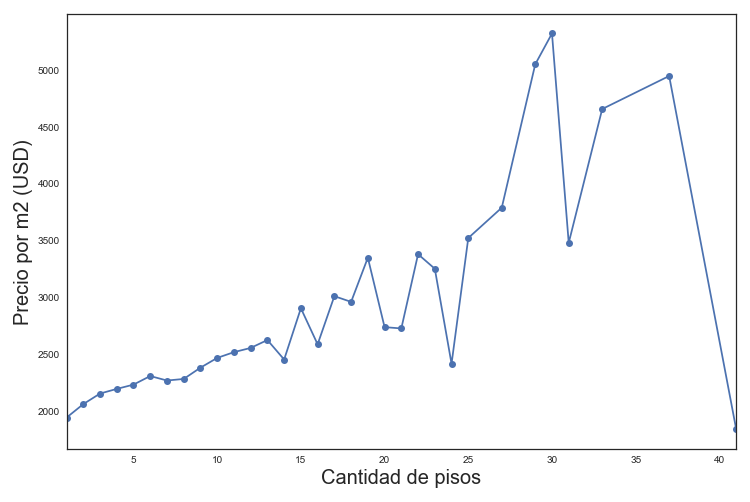

In [181]:
piso_vs_precio = properati_filtrado.loc[:,('price_usd_per_m2','floor')].dropna()
piso_vs_precio = piso_vs_precio.loc[piso_vs_precio.floor < 55] #https://es.wikipedia.org/wiki/Anexo:Edificios_m%C3%A1s_altos_de_Argentina
piso_vs_precio = piso_vs_precio.groupby(properati_filtrado.floor)
piso_vs_precio = piso_vs_precio.mean()['price_usd_per_m2']
piso_vs_precio.plot(kind='line',marker="o",figsize=TAM_IMG)

titulo ='Piso del departamento vs precio por m2'
plt.ylabel('Precio por m2 (USD)')
plt.xlabel('Cantidad de pisos')
guardar_imagen(titulo)
plt.show()

##  Piso del departamento vs expensas

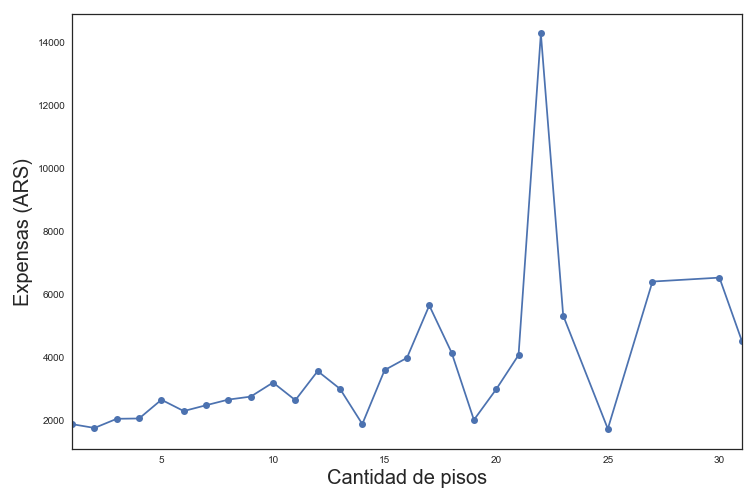

In [182]:
piso_vs_expensas = properati_filtrado.loc[:,('floor','expenses')].dropna(subset=['expenses'])
piso_vs_expensas = piso_vs_expensas.loc[properati_filtrado.floor <50]
piso_vs_expensas = piso_vs_expensas.groupby(properati_filtrado.floor).mean()['expenses']
piso_vs_expensas.plot(kind='line',marker="o",figsize=TAM_IMG)

titulo = 'Piso del departamento vs expensas'
plt.ylabel('Expensas (ARS)')
plt.xlabel('Cantidad de pisos')

guardar_imagen(titulo)
plt.show()

In [183]:
caba_para_mapa = caba.dropna(subset= ['lat','lon'])
caba_para_mapa = caba_para_mapa.loc[(caba_para_mapa.lat > -35) & (caba_para_mapa.lat < -34) & (caba_para_mapa.lon > -58.7)] #preparo para calcular distancias
caba_para_mapa['lat-lon'] = [(x, y) for x,y in zip(caba_para_mapa['lat'], caba_para_mapa['lon'])] #preparo para calcular distancias
#gp.scatter(caba_para_mapa['lat'], caba_para_mapa['lon'],colors='blue') #reviso si filtre bien "puntos malos"

In [184]:
todo_para_mapa = properati_filtrado.dropna(subset= ['lat','lon'])
todo_para_mapa['lat-lon'] = [(x, y) for x,y in zip(todo_para_mapa['lat'], todo_para_mapa['lon'])] #preparo para calcular distancias
todo_para_mapa = todo_para_mapa.loc[(todo_para_mapa.lat > -36) & (todo_para_mapa.lat < -34.2) & (todo_para_mapa.lon > -59)] 
#gp.scatter(todo_para_mapa['lat'], todo_para_mapa['lon'],colors='blue') #reviso si filtre bien "puntos malos"

/home/ale/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Relacion entre distancia a boca de subte vs precio por m2 CABA

In [185]:
subtes = pd.read_csv('datos/datasets/CABA/latlon/estaciones-de-subte.csv')
subtes['lat-lon'] = [(x, y) for x,y in zip(subtes['y'], subtes['x'])]

In [186]:
#gp.scatter(subtes['y'], subtes['x'],colors='red')

In [187]:
caba_para_mapa['dist_a_subte'] = [distancia_minima(x, list(subtes['lat-lon'])) for x in caba_para_mapa['lat-lon']]

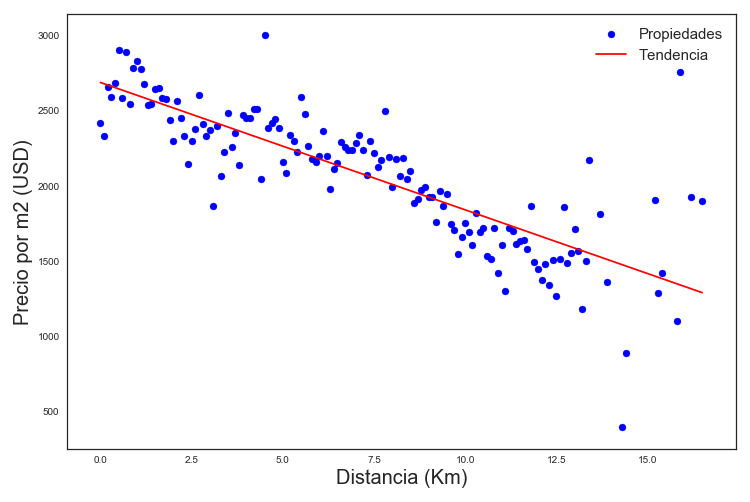

In [188]:
resultados = caba_para_mapa.loc[:,('dist_a_subte','price_usd_per_m2')].groupby('dist_a_subte').mean().reset_index()
titulo = 'Relacion entre distancia a boca de subte vs precio por m2 CABA'
plotear_distancias(resultados,'dist_a_subte','price_usd_per_m2',titulo,'Distancia (Km)','Precio por m2 (USD)')

In [189]:
colectivos = pd.read_csv('datos/datasets/CABA/latlon/paradas-de-colectivo.csv')

In [190]:
#gp.scatter(colectivos['Y'], colectivos['X'],colors='red')

In [191]:
metrobus = pd.read_csv('datos/datasets/CABA/latlon/estaciones-de-metrobus.csv')

In [192]:
#gp.scatter(metrobus['Y'], metrobus['X'],colors='red')

In [193]:
trenes = pd.read_csv('datos/datasets/CABA/latlon/estaciones-de-ferrocarril.csv',error_bad_lines=False)
trenes['lat-lon'] = [(x, y) for x,y in zip(trenes['LAT'], trenes['LNG'])]

In [194]:
#gp.scatter(trenes['LAT'], trenes['LNG'],colors='red')

## Relacion entre distancia a estacion de tren vs precio por m2 CABA

In [195]:
caba_para_mapa['dist_a_tren'] = [distancia_minima(x, list(trenes['lat-lon'])) for x in caba_para_mapa['lat-lon']]

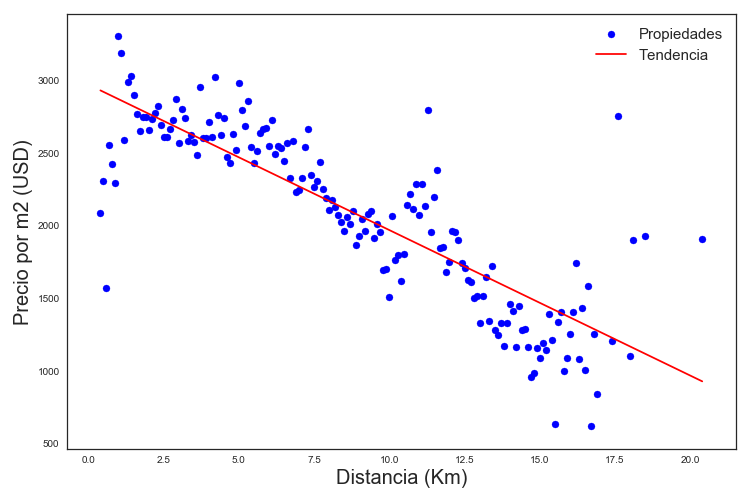

In [196]:
resultados = caba_para_mapa.loc[:,('dist_a_tren','price_usd_per_m2')].groupby('dist_a_tren').mean().reset_index()
titulo = 'Relacion entre distancia a estacion de tren vs precio por m2 CABA'
plotear_distancias(resultados,'dist_a_tren','price_usd_per_m2',titulo,'Distancia (Km)','Precio por m2 (USD)')

## Relacion entre distancia a una universidad vs precio por m2 CABA

In [197]:
univ = pd.read_csv('datos/datasets/CABA/latlon/universidades.csv',error_bad_lines=False)
univ['lat-lon']= [(x, y) for x,y in zip(univ['LAT'], univ['LNG'])]

In [198]:
caba_para_mapa['dist_a_univ'] = [distancia_minima(x, list(univ['lat-lon'])) for x in caba_para_mapa['lat-lon']]

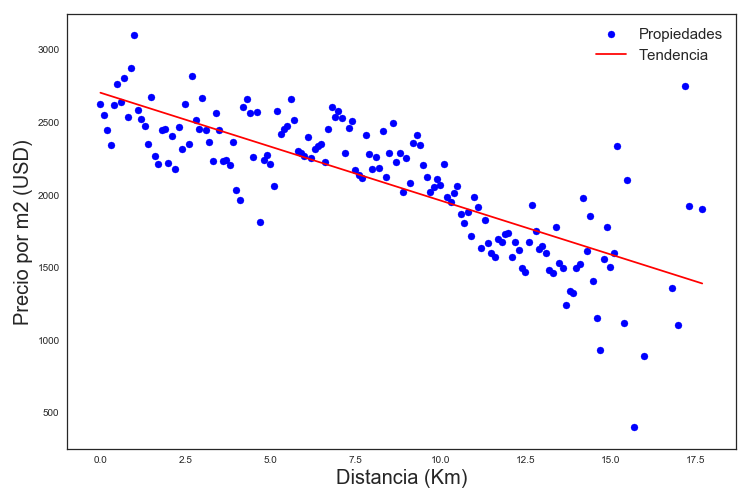

In [199]:
resultados = caba_para_mapa.loc[:,('dist_a_univ','price_usd_per_m2')].groupby('dist_a_univ').mean().reset_index()
titulo = 'Relacion entre distancia a una universidad vs precio por m2 CABA'
plotear_distancias(resultados,'dist_a_univ','price_usd_per_m2',titulo,'Distancia (Km)','Precio por m2 (USD)')

## Relacion entre distancia a una villas (o asentamiento) vs precio por m2 CABA

In [200]:
villas = pd.read_csv('datos/datasets/no_CABA/poligonos/informacin-socioeconmica-asentamientos-y-villas-ong-techo.csv')
villas= villas.loc[villas['provincia']=='CABA']
villas['geojson']= [shape(geojson.loads(x)).centroid.xy for x in villas['geojson'].values]
villas['geojson']  = [(x[1][0],x[0][0]) for x in villas['geojson']]

In [201]:
caba_para_mapa.loc[:,('dist_a_villa')] = [distancia_minima(x,list(villas.loc[:,('geojson')])) for x in caba_para_mapa.loc[:,('lat-lon')]] 

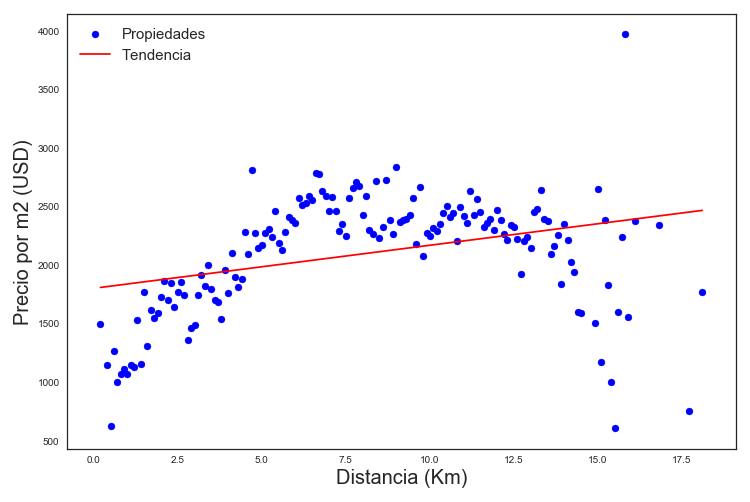

In [202]:
resultados = caba_para_mapa.loc[:,('dist_a_villa','price_usd_per_m2')].groupby('dist_a_villa').mean().reset_index()
titulo = 'Relacion entre distancia a una villas (o asentamiento) vs precio por m2 CABA'
plotear_distancias(resultados,'dist_a_villa','price_usd_per_m2',titulo,'Distancia (Km)','Precio por m2 (USD)')

In [203]:
zonas_anegadas=pd.read_csv('datos/datasets/CABA/poligonos/sitios-pasibles-de-anegamiento-por-precipitacion-2014.csv')
zonas_anegadas['lat-lon']= [loads(x).centroid.xy for x in zonas_anegadas['WKT'].values]
zonas_anegadas['lat-lon']= [(x[1][0],x[0][0]) for x in zonas_anegadas['lat-lon']]

In [204]:
#gp.polygons(zonas_anegadas['lon'],zonas_anegadas['lat'],zonas_anegadas['cluster'])

In [205]:
caba_para_mapa['dist_a_zona_anegada'] = [distancia_minima(x, list(zonas_anegadas['lat-lon'])) for x in caba_para_mapa['lat-lon']]

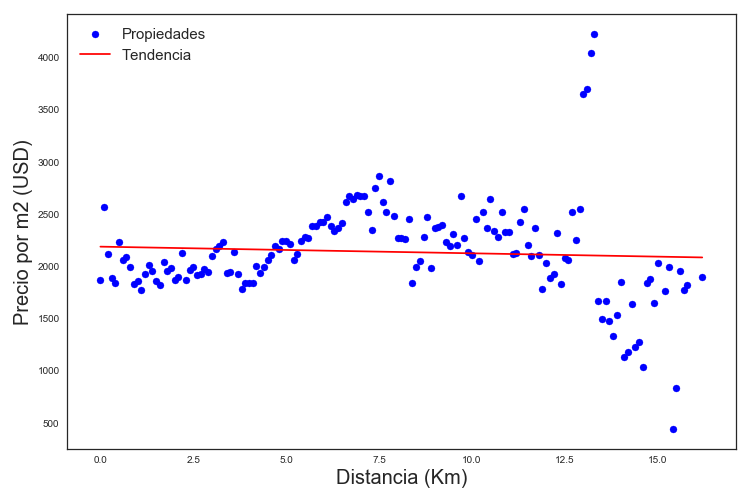

In [206]:
resultados = caba_para_mapa.loc[:,('dist_a_zona_anegada','price_usd_per_m2')].groupby('dist_a_zona_anegada').mean().reset_index()
titulo = 'Cercania entre zonas anegadas y precio por m2'
plotear_distancias(resultados,'dist_a_zona_anegada','price_usd_per_m2',titulo,'Distancia (Km)','Precio por m2 (USD)')

In [207]:
caba_para_mapa.to_csv('datos/caba_para_mapa.csv',index=False)

In [208]:
properati_filtrado.reset_index()
properati_filtrado.to_csv('datos/properati_final.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136356 entries, 0 to 182869
Data columns (total 23 columns):
created_on                    136356 non-null datetime64[ns]
property_type                 136356 non-null object
place_name                    136356 non-null object
state_name                    136356 non-null object
lat-lon                       136356 non-null object
lat                           96345 non-null float64
lon                           96345 non-null float64
price                         136356 non-null float64
currency                      136356 non-null object
price_aprox_local_currency    136356 non-null float64
price_aprox_usd               136356 non-null float64
surface_total_in_m2           136356 non-null float64
surface_covered_in_m2         136356 non-null float64
price_usd_per_m2              136356 non-null float64
price_per_m2                  136356 non-null float64
floor                         14295 non-null float64
rooms                     

In [209]:
properati_filtrado

,created_on,property_type,place_name,state_name,lat-lon,lat,lon,price,currency,price_aprox_local_currency,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,fecha,superficie_descubierta
0,2015-07-01,apartment,Palermo,Capital Federal,"(-34.5745944268,-58.4192548517,)",-34.574594,-58.419255,71000.0,USD,1.252760e+06,...,2448.0,43198.000000,NaN,1.0,1500.0,http://www.properati.com.ar/rlpn_venta_departa...,VENTA DEPARTAMENTO DE 1 AMBIENTE CON PATIO EN ...,Departamento en Palermo,"(2015, 7)",NaN
1,2015-07-01,house,Lanús,Bs.As. G.B.A. Zona Sur,"(nan,)",NaN,NaN,140000.0,USD,2.470230e+06,...,42.0,756.756757,NaN,NaN,NaN,http://www.properati.com.ar/rlq6_venta_casa_lanus,None- Estado del inmueble: EXCELENTE- Mejoras:...,.,"(2015, 7)",NaN
2,2015-07-01,house,Temperley,Bs.As. G.B.A. Zona Sur,"(-34.7890466,-58.4135609,)",-34.789047,-58.413561,165000.0,USD,2.911342e+06,...,46.0,825.000000,NaN,NaN,NaN,http://www.properati.com.ar/rlq7_venta_casa_te...,"Muy buen Chalet, a 2 cuadras e Hipermeracado J...",Casa en Temperley Oeste,"(2015, 7)",NaN
3,2015-07-01,house,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,"(-34.7507803881,-58.3734663672,)",-34.750780,-58.373466,148000.0,USD,2.611386e+06,...,33.0,596.774194,NaN,NaN,NaN,http://www.properati.com.ar/rlq9_venta_casa_lo...,None- Estado del inmueble: REGULAR- Tiene gara...,Casa en Lomas de Zamora Oeste,"(2015, 7)",NaN
4,2015-07-01,apartment,Temperley,Bs.As. G.B.A. Zona Sur,"(nan,)",NaN,NaN,132000.0,USD,2.329074e+06,...,1178.0,20795.000000,NaN,NaN,270.0,http://www.properati.com.ar/rlqa_venta_departa...,"Muy buen departamento; sobre avenida, a 6 cuad...",Departamento en Temperley Este,"(2015, 7)",NaN
5,2015-07-01,apartment,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,"(-34.7620958,-58.3998013,)",-34.762096,-58.399801,190000.0,USD,3.352455e+06,...,1979.0,34921.000000,NaN,NaN,650.0,http://www.properati.com.ar/rlqb_venta_departa...,--Exclusivo Departamento de 3 Dormitorios--Tot...,Departamento en Lomas de Zamora Oeste,"(2015, 7)",6.0
6,2015-07-01,house,Banfield,Bs.As. G.B.A. Zona Sur,"(-34.7484869,-58.4011536,)",-34.748487,-58.401154,250000.0,USD,4.411125e+06,...,83.0,1470.588235,NaN,NaN,NaN,http://www.properati.com.ar/rlqd_venta_casa_ba...,"Hermoso Chalet en excelente zona residencial, ...",Casa en Banfield Oeste,"(2015, 7)",NaN
7,2015-07-01,apartment,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,"(-34.7598575143,-58.4009207037,)",-34.759858,-58.400921,119000.0,USD,2.099696e+06,...,1252.0,22102.000000,NaN,NaN,1500.0,http://www.properati.com.ar/rlqe_venta_departa...,"Muy buen departamento al frente, amplios ambie...",Oportunidad,"(2015, 7)",8.0
8,2015-07-01,store,Temperley,Bs.As. G.B.A. Zona Sur,"(-34.7791545891,-58.402501963,)",-34.779155,-58.402502,98000.0,USD,1.729161e+06,...,2279.0,40213.000000,NaN,NaN,NaN,http://www.properati.com.ar/rlqf_venta_local_t...,Actualmente Alquilado.- Superficie cubierta su...,Local en Esquina,"(2015, 7)",43.0
9,2015-07-01,apartment,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,"(-34.7613584,-58.4041825,)",-34.761358,-58.404182,110000.0,USD,1.940895e+06,...,2075.0,36620.000000,NaN,2.0,580.0,http://www.properati.com.ar/rlqg_venta_departa...,+++EXCLUSIVO SEMIPISO A ESTRENAR+++Dormitorio ...,Departamento en Lomas de Zamora Oeste,"(2015, 7)",10.0
